In [ ]:
!pip install bertopic[visualization] --quiet

In [ ]:
import numpy as np
import pandas as pd
from copy import deepcopy
from bertopic import BERTopic

In [ ]:
import pandas as pd

# Load the data
file_path = '/content/cleaned_text(1).csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

                                cleaned_text
0  love well made sturdi comfort love pretti
1   love great upgrad origin mine coupl year
2     pillow save back love look feel pillow
3        miss inform use great product price
4        nice set good qualiti set two month


In [ ]:
docs = list(df.loc[:, "cleaned_text"].values)

In [ ]:
docs[:5]

['love well made sturdi comfort love pretti',
 'love great upgrad origin mine coupl year',
 'pillow save back love look feel pillow',
 'miss inform use great product price',
 'nice set good qualiti set two month']

In [ ]:
model = BERTopic(language="english")

In [ ]:
topics, probs = model.fit_transform(docs)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
model.get_topic_freq()

,Topic,Count
0,-1,13273
13,0,12093
38,1,1449
20,2,1319
17,3,1149
4,4,1135
29,5,927
44,6,854
5,7,785
2,8,608


In [ ]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,13273,-1_dog_size_fit_wear,"[dog, size, fit, wear, use, bought, product, s...",[plea item great product price easi use also l...
1,0,9022,0_book_read_stori_charact,"[book, read, stori, charact, author, seri, enj...",[know feel read last one first one sweet sweet...
2,1,3046,1_movi_film_act_watch,"[movi, film, act, watch, show, action, dvd, go...",[funni movi love movi also funni movi realli e...
3,2,1277,2_light_bulb_bright_led,"[light, bulb, bright, led, flashlight, lamp, s...","[nice bulb replac bright work well look great,..."
4,3,832,3_sound_speaker_headphon_ear,"[sound, speaker, headphon, ear, earbud, bass, ...",[flash recharg bit slow qualiti good conclus p...
...,...,...,...,...,...
249,248,11,248_mount_leupold_5d_vertic,"[mount, leupold, 5d, vertic, vx3, eavestrough,...","[great mount hold bottl well come easi, mount ..."
250,249,10,249_bulki_meveri_flaw_theoret,"[bulki, meveri, flaw, theoret, kinet, bit, des...",[work great littl bulki work great would recom...
251,250,10,250_normal_width_wear_wide,"[normal, width, wear, wide, 10in, size, order,...",[super cute wish wide width normal wear size o...
252,251,10,251_cat_themw_dog_pet,"[cat, themw, dog, pet, ferret, dogi, two, agai...",[awesom custom servic order cat perfect cat lo...


In [ ]:
model.save("my_model")

2024-11-27 08:49:50,748 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [ ]:
my_model = BERTopic.load("my_model")

In [ ]:
from sklearn.model_selection import train_test_split

# Assume `docs` is the list of documents and `topics` contains the topic assignments
X_train, X_test, y_train, y_test = train_test_split(docs, topics, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")


Training set size: 32344
Test set size: 8087


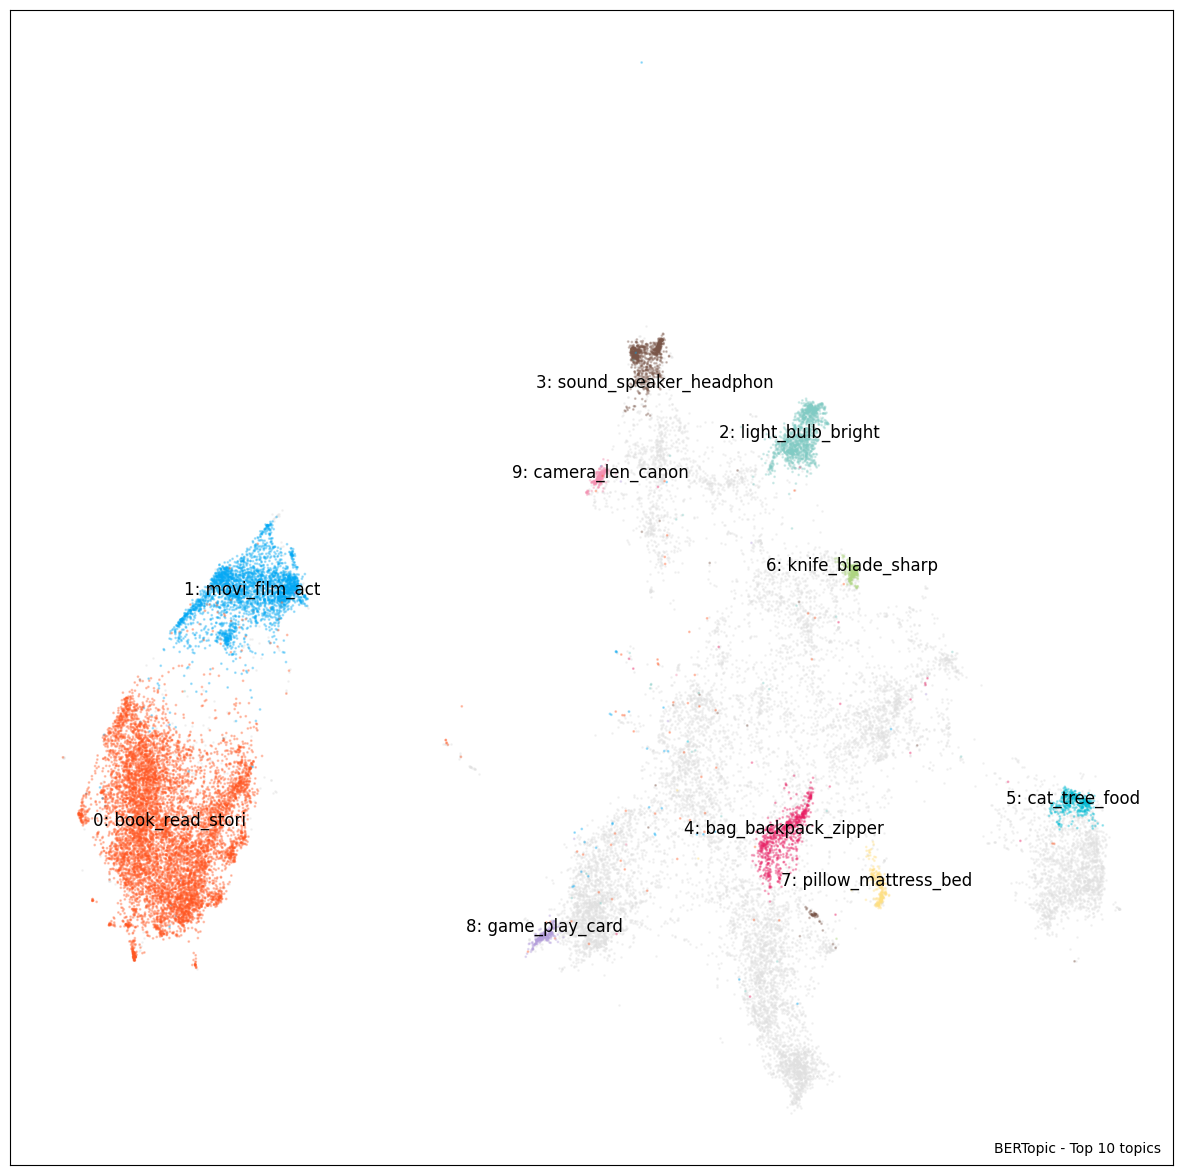

In [ ]:
import numpy as np
import pandas as pd
from umap import UMAP

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# Prepare data for plotting
embeddings = model._extract_embeddings(docs, method="document")
umap_model = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit(embeddings)
df = pd.DataFrame(umap_model.embedding_, columns=["x", "y"])
df["topic"] = topics

# Plot parameters
top_n = 10
fontsize = 12

# Slice data
to_plot = df.copy()
to_plot[df.topic >= top_n] = -1
outliers = to_plot.loc[to_plot.topic == -1]
non_outliers = to_plot.loc[to_plot.topic != -1]

# Visualize topics
cmap = matplotlib.colors.ListedColormap(['#FF5722', # Red
                                        '#03A9F4', # Blue
                                        '#4CAF50', # Green
                                        '#80CBC4', # FFEB3B
                                        '#673AB7', # Purple
                                        '#795548', # Brown
                                        '#E91E63', # Pink
                                        '#212121', # Black
                                        '#00BCD4', # Light Blue
                                        '#CDDC39', # Yellow/Red
                                        '#AED581', # Light Green
                                        '#FFE082', # Light Orange
                                        '#BCAAA4', # Light Brown
                                        '#B39DDB', # Light Purple
                                        '#F48FB1', # Light Pink
                                        ])

# Visualize outliers + inliers
fig, ax = plt.subplots(figsize=(15, 15))
scatter_outliers = ax.scatter(outliers['x'], outliers['y'], c="#E0E0E0", s=1, alpha=.3)
scatter = ax.scatter(non_outliers['x'], non_outliers['y'], c=non_outliers['topic'], s=1, alpha=.3, cmap=cmap)

# Add topic names to clusters
centroids = to_plot.groupby("topic").mean().reset_index().iloc[1:]
for row in centroids.iterrows():
   topic = int(row[1].topic)
   text = f"{topic}: " + "_".join([x[0] for x in model.get_topic(topic)[:3]])
   ax.text(row[1].x, row[1].y*1.01, text, fontsize=fontsize, horizontalalignment='center')

ax.text(0.99, 0.01, f"BERTopic - Top {top_n} topics", transform=ax.transAxes, horizontalalignment="right", color="black")
plt.xticks([], [])
plt.yticks([], [])
plt.savefig("BERTopic_Example_Cluster_Plot.png")
plt.show()

In [ ]:
model.visualize_topics()

In [ ]:
model.get_topic(0)[:10]

[('book', 0.012090611164459338),
 ('read', 0.010936606499122271),
 ('stori', 0.009555599026080835),
 ('charact', 0.00941659177229882),
 ('author', 0.008160254736970001),
 ('seri', 0.007666549629795492),
 ('enjoy', 0.007045583594416472),
 ('written', 0.006317585515755879),
 ('interest', 0.0059798111544944205),
 ('develop', 0.005963726006547176)]

In [ ]:
model.topics_[:10]

[-1, 13, 7, 49, -1, -1, -1, -1, 30, 116]

In [ ]:
model.update_topics(docs, n_gram_range=(1, 3))

In [ ]:
model.get_topic(18)

[('smell', 0.05837622149093087),
 ('brush', 0.035654168103417136),
 ('hair', 0.019592699973458954),
 ('shampoo', 0.017361570954966328),
 ('use', 0.01704869230977748),
 ('dog', 0.016838561016818448),
 ('scent', 0.0166422270244571),
 ('cat', 0.014624285482022742),
 ('odor', 0.01303742216302327),
 ('clean', 0.012361944028222266)]